## Sample Analysis

In [ ]:
install.packages("dplyr")
library(dplyr, warn.conflicts = FALSE)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
install.packages("psych")
library(psych)

Warning message in install.packages("psych"):
“installation of package ‘psych’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [5]:
library(ggplot2)
library(reshape2)


Attaching package: ‘ggplot2’

The following objects are masked from ‘package:psych’:

    %+%, alpha



In [6]:
boston <- read.table('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data')

In [7]:
features <- c('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV')
boston_stats <- data.frame(features)
stats <- describe(boston)
stats$vars <- NULL; stats$trimmed <- NULL; stats$mad <- NULL;
boston_stats <- cbind(boston_stats, stats)
boston_stats

,features,n,mean,sd,median,min,max,range,skew,kurtosis,se
V1,CRIM,506,3.61352356,8.6015451,0.25651,0.00632,88.9762,88.96988,5.1922223,36.59581589,0.382385321
V2,ZN,506,11.36363636,23.3224530,0.00000,0.00000,100.0000,100.00000,2.2124881,3.95238731,1.036809500
V3,INDUS,506,11.13677866,6.8603529,9.69000,0.46000,27.7400,27.28000,0.2932747,-1.24019490,0.304979888
V4,CHAS,506,0.06916996,0.2539940,0.00000,0.00000,1.0000,1.00000,3.3857377,9.48197035,0.011291412
V5,NOX,506,0.55469506,0.1158777,0.53800,0.38500,0.8710,0.48600,0.7249897,-0.08741064,0.005151391
V6,RM,506,6.28463439,0.7026171,6.20850,3.56100,8.7800,5.21900,0.4012223,1.84183241,0.031235142
V7,AGE,506,68.57490119,28.1488614,77.50000,2.90000,100.0000,97.10000,-0.5954162,-0.97802966,1.251369525
V8,DIS,506,3.79504269,2.1057101,3.20745,1.12960,12.1265,10.99690,1.0057898,0.45759158,0.093610233
V9,RAD,506,9.54940711,8.7072594,5.00000,1.00000,24.0000,23.00000,0.9988651,-0.87892910,0.387084894
V10,TAX,506,408.23715415,168.5371161,330.00000,187.00000,711.0000,524.00000,0.6659891,-1.15031761,7.492388692


#### Data subset (n = 5)

In [8]:
randomSample = function(df, n){
    return (df[sample(nrow(df), n),])
}

In [9]:
samp <- randomSample(boston,5)
colnames(samp) <- features
samp

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
47,0.18836,0,6.91,0,0.448,5.786,33.3,5.1004,3,233,17.9,396.90,14.15,20.0
251,0.14030,22,5.86,0,0.431,6.487,13.0,7.3967,7,330,19.1,396.28,5.90,24.4
494,0.17331,0,9.69,0,0.585,5.707,54.0,2.3817,6,391,19.2,396.90,12.01,21.8
114,0.22212,0,10.01,0,0.547,6.092,95.4,2.5480,6,432,17.8,396.90,17.09,18.7
427,12.24720,0,18.10,0,0.584,5.837,59.7,1.9976,24,666,20.2,24.65,15.69,10.2


### Data Description 

The 2nd sample might be representative of a new, up-and-coming,  wealthy, but sparsely populated neighborhood. It has low crime rates `CRIM` = 0.04 , as well as a low pupil-to-teacher ratio `PTRATIO` = 16.9. It has the smallest proportion of owner-occupied units built prior the  1940s `AGE`. 

The 3rd sample `221` might be representative of a *downtown* region in Boston.  It has a small `DIS` value, which is the distance to five Boston employment centers. It also has the highest `MEDV` value of all 5 sampled, meaning housing in that region is the most expensive. 

The 5th sample, `479` is perhaps the most distinctive of the 5 sampled. It might be representative of an *urban area*.
It has a high proportion of non-retail businesses (perhaps highly residential, heavily populated). It has significantly higher nitrous oxide `NOX` levels and full-value property-tax rate `TAX`. The pupil to teacher ratio is also on the higher end. It also has the highest `RAD` value meaning that it is easily accessible to radial highways. As typical for the an urban city region, it has a high `LSTAT` value, meaning that there is a larger percent of lower-status individuals in the population.

** Minor note, I definitely forgot to set a seed when I randomized these samples. So, these data descriptions might not reflect the displayed sample after running the code again.

In [10]:
samp_stats <- describe(samp)
samp_stats <- cbind(features, samp_stats)
samp_stats$vars <- NULL ; samp_stats$trimmed <- NULL ; samp_stats$mad <- NULL
samp_stats

,features,n,mean,sd,median,min,max,range,skew,kurtosis,se
CRIM,CRIM,5,2.594258,5.39623879,0.18836,0.1403,12.2472,12.1069,1.0732329,-0.9200951,2.41327135
ZN,ZN,5,4.400000,9.83869910,0.00000,0.0000,22.0000,22.0000,1.0733126,-0.9200000,4.40000000
INDUS,INDUS,5,10.114000,4.80439694,9.69000,5.8600,18.1000,12.2400,0.7202515,-1.3106635,2.14859163
CHAS,CHAS,5,0.000000,0.00000000,0.00000,0.0000,0.0000,0.0000,NaN,NaN,0.00000000
NOX,NOX,5,0.519000,0.07441438,0.54700,0.4310,0.5850,0.1540,-0.2209869,-2.1989198,0.03327912
RM,RM,5,5.981800,0.31709257,5.83700,5.7070,6.4870,0.7800,0.6209273,-1.5578361,0.14180811
AGE,AGE,5,51.080000,30.87599391,54.00000,13.0000,95.4000,82.4000,0.1826501,-1.6649665,13.80816425
DIS,DIS,5,3.884880,2.31403288,2.54800,1.9976,7.3967,5.3991,0.5261657,-1.7774749,1.03486696
RAD,RAD,5,9.200000,8.40832920,6.00000,3.0000,24.0000,21.0000,0.9848388,-1.0118277,3.76031914
TAX,TAX,5,410.400000,161.32978646,391.00000,233.0000,666.0000,433.0000,0.5048294,-1.4350219,72.14887387


#### Z-scores of sample data set

Z-score = $(X - \mu)/\sigma $

where $X$ = sample mean, and $\mu$ = population mean, and $\sigma$ = population standard dev

In [11]:
z_score <- function (X, mu, sd){
    z <- (X - mu)/sd
    return(z)
}

#### Bar Plot

Z-scores for the sample means.
Z-scores close to 0 indicate that the sample mean is close to the population mean. 

In [12]:
samp_z_score <- z_score(samp_stats$mean, boston_stats$mean, boston_stats$sd)
samp_z_df <- data.frame(features, samp_z_score)
samp_z_df

features,samp_z_score
CRIM,-0.11849796
ZN,-0.29858079
INDUS,-0.14908543
CHAS,-0.27232907
NOX,-0.30804086
RM,-0.43100911
AGE,-0.62151364
DIS,0.04266367
RAD,-0.04012825
TAX,0.01283305


In [13]:
samp_z_df1 <- subset(samp_z_df, samp_z_score >= 0)
samp_z_df2 <- subset(samp_z_df, samp_z_score <0)


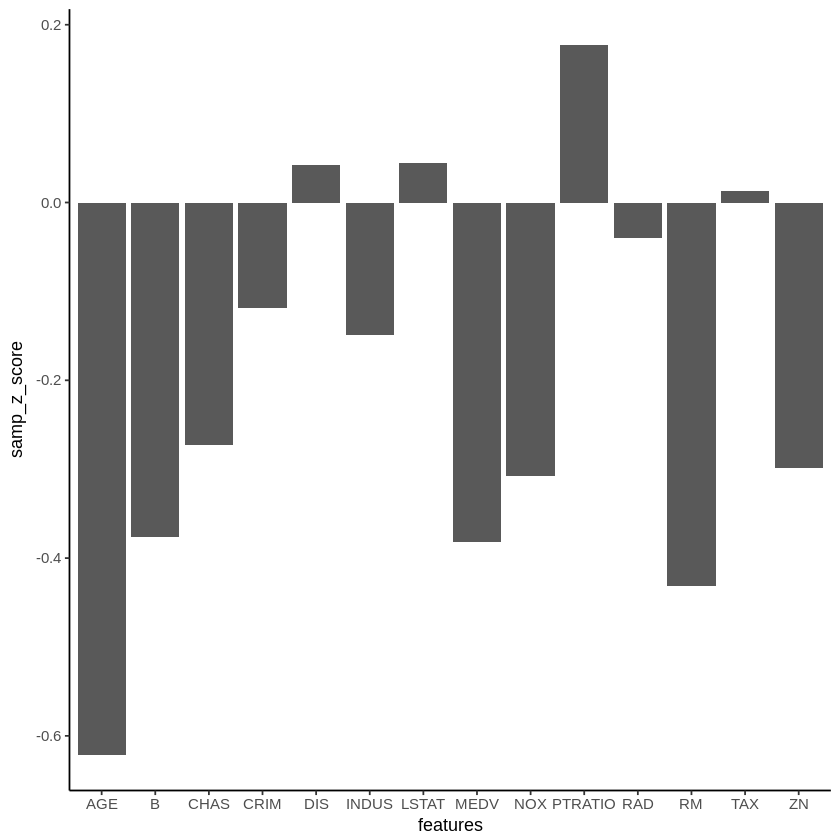

In [14]:
ggplot() +
    geom_bar(data=samp_z_df1, aes(x=features, y=samp_z_score), stat = "identity") +
    geom_bar(data=samp_z_df2, aes(x=features, y=samp_z_score), stat = "identity") +
    theme_classic()

#### Heat Map

For a heat map: X-axis feature, Y-axis instances, Z = color

In [15]:
t(samp)
samp_stats

,47,251,494,114,427
CRIM,0.18836,0.1403,0.17331,0.22212,12.2472
ZN,0.00000,22.0000,0.00000,0.00000,0.0000
INDUS,6.91000,5.8600,9.69000,10.01000,18.1000
CHAS,0.00000,0.0000,0.00000,0.00000,0.0000
NOX,0.44800,0.4310,0.58500,0.54700,0.5840
RM,5.78600,6.4870,5.70700,6.09200,5.8370
AGE,33.30000,13.0000,54.00000,95.40000,59.7000
DIS,5.10040,7.3967,2.38170,2.54800,1.9976
RAD,3.00000,7.0000,6.00000,6.00000,24.0000
TAX,233.00000,330.0000,391.00000,432.00000,666.0000


,features,n,mean,sd,median,min,max,range,skew,kurtosis,se
CRIM,CRIM,5,2.594258,5.39623879,0.18836,0.1403,12.2472,12.1069,1.0732329,-0.9200951,2.41327135
ZN,ZN,5,4.400000,9.83869910,0.00000,0.0000,22.0000,22.0000,1.0733126,-0.9200000,4.40000000
INDUS,INDUS,5,10.114000,4.80439694,9.69000,5.8600,18.1000,12.2400,0.7202515,-1.3106635,2.14859163
CHAS,CHAS,5,0.000000,0.00000000,0.00000,0.0000,0.0000,0.0000,NaN,NaN,0.00000000
NOX,NOX,5,0.519000,0.07441438,0.54700,0.4310,0.5850,0.1540,-0.2209869,-2.1989198,0.03327912
RM,RM,5,5.981800,0.31709257,5.83700,5.7070,6.4870,0.7800,0.6209273,-1.5578361,0.14180811
AGE,AGE,5,51.080000,30.87599391,54.00000,13.0000,95.4000,82.4000,0.1826501,-1.6649665,13.80816425
DIS,DIS,5,3.884880,2.31403288,2.54800,1.9976,7.3967,5.3991,0.5261657,-1.7774749,1.03486696
RAD,RAD,5,9.200000,8.40832920,6.00000,3.0000,24.0000,21.0000,0.9848388,-1.0118277,3.76031914
TAX,TAX,5,410.400000,161.32978646,391.00000,233.0000,666.0000,433.0000,0.5048294,-1.4350219,72.14887387


In [16]:
# create point-z scores
point_z_scores <- function(samp_df, stats_df){
    features <- (rownames(stats_df))
    point_z_df <- data.frame(features)
    col <- colnames(samp_df)
    z_scores_r1 <- (samp_df[[1]]-stats_df$mean) / stats_df$sd
    z_scores_r2 <- (samp_df[[2]]-stats_df$mean) / stats_df$sd
    z_scores_r3 <- (samp_df[[3]]-stats_df$mean) / stats_df$sd
    z_scores_r4 <- (samp_df[[4]]-stats_df$mean) / stats_df$sd
    z_scores_r5 <- (samp_df[[5]]-stats_df$mean) / stats_df$sd
    z_scores <- cbind(z_scores_r1, z_scores_r2, z_scores_r3, z_scores_r4, z_scores_r5)
    colnames(z_scores) <- col
    point_z_df <- cbind(point_z_df, z_scores)
    return(point_z_df)
}
a <- point_z_scores(t(samp), samp_stats)
a

features,47,251,494,114,427
CRIM,-0.4458472,-0.4807530,0.7997685,-0.4807530,-0.3977322
ZN,-0.4280688,-0.4472136,0.2551150,-0.4472136,-0.4016791
INDUS,-2.0659492,-2.1051549,-0.6668891,-2.1051549,-2.0119070
CHAS,Inf,NaN,Inf,NaN,Inf
NOX,-4.4432272,-6.9744584,85.8839376,-6.9744584,-0.9541167
RM,-18.2705004,-18.8645226,2.9272209,-18.8645226,-17.4516859
AGE,-1.6482592,-1.6543597,-1.4305612,-1.6543597,-1.6398500
DIS,-1.5974362,-1.6788353,1.3072934,-1.6788353,-1.4852339
RAD,-1.0717516,-1.0941532,-0.2723490,-1.0941532,-1.0408727
TAX,-2.5426900,-2.5438576,-2.5010261,-2.5438576,-2.5410807


In [17]:
# remove `CHAS`
a <- a[-4,]
a

,features,47,251,494,114,427
1,CRIM,-0.4458472,-0.4807530,0.7997685,-0.4807530,-0.3977322
2,ZN,-0.4280688,-0.4472136,0.2551150,-0.4472136,-0.4016791
3,INDUS,-2.0659492,-2.1051549,-0.6668891,-2.1051549,-2.0119070
5,NOX,-4.4432272,-6.9744584,85.8839376,-6.9744584,-0.9541167
6,RM,-18.2705004,-18.8645226,2.9272209,-18.8645226,-17.4516859
7,AGE,-1.6482592,-1.6543597,-1.4305612,-1.6543597,-1.6398500
8,DIS,-1.5974362,-1.6788353,1.3072934,-1.6788353,-1.4852339
9,RAD,-1.0717516,-1.0941532,-0.2723490,-1.0941532,-1.0408727
10,TAX,-2.5426900,-2.5438576,-2.5010261,-2.5438576,-2.5410807
11,PTRATIO,-18.6237253,-18.8118034,-11.9121452,-18.8118034,-18.3644739


Using features as id variables


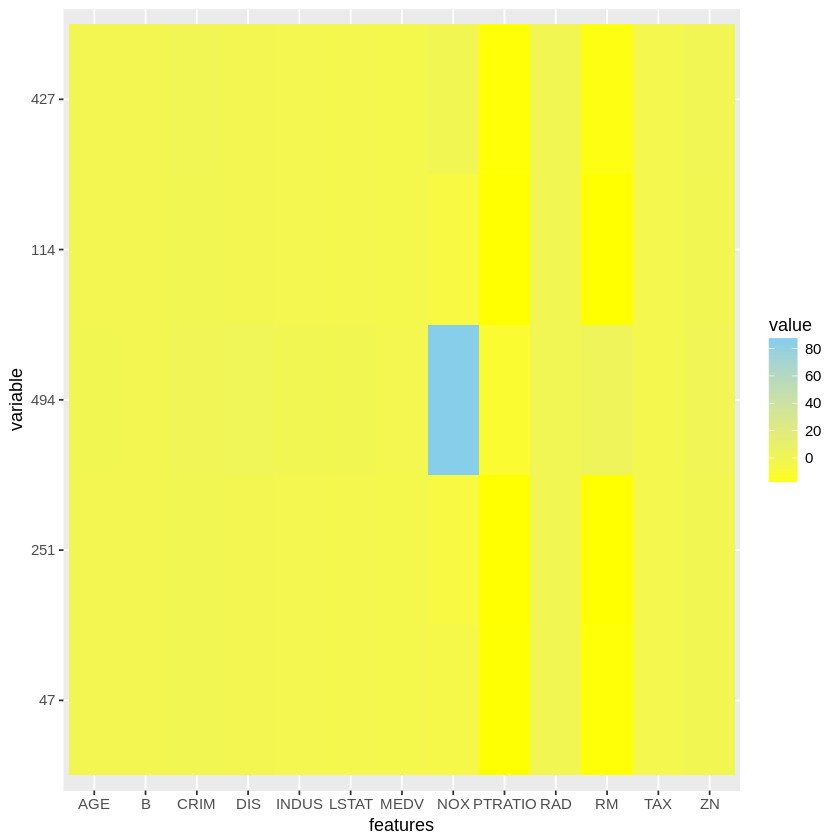

In [18]:
a <- melt(a)
ggplot(a, aes(x=features, y=variable)) + 
    geom_tile(aes(fill=value)) +
    scale_fill_gradient(low="yellow", high="skyblue")

The heatmap for the Z-scores is not particularly descriptive since there are outliers with very large Z-scores.

### Comparing Values

Before scaling our data to Z-scores, we can not compare values across categories (different means and standard deviations). Ex: we cannot compare ages with proportions, since they are not in the same scale.

However, by taking the Z-score of the sample, we can compare each feature of the sample since they now have means around 0, and standard deviations of 1. This places each feature on the same scale. 